### TL;DR:


The system builds the circuit..

For 3 solutions, 2 iterations needed.

The high level circuit:


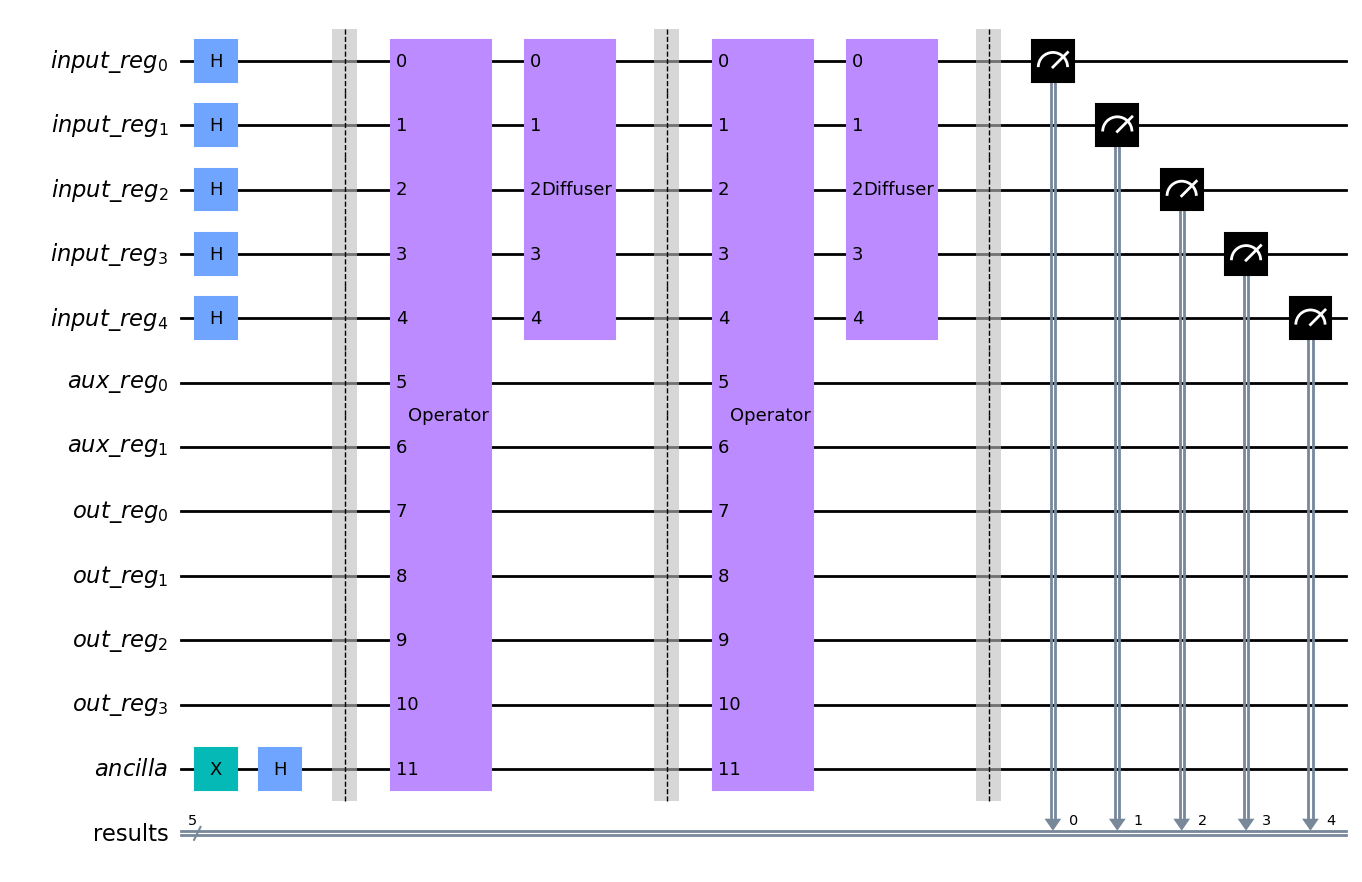


The operator:


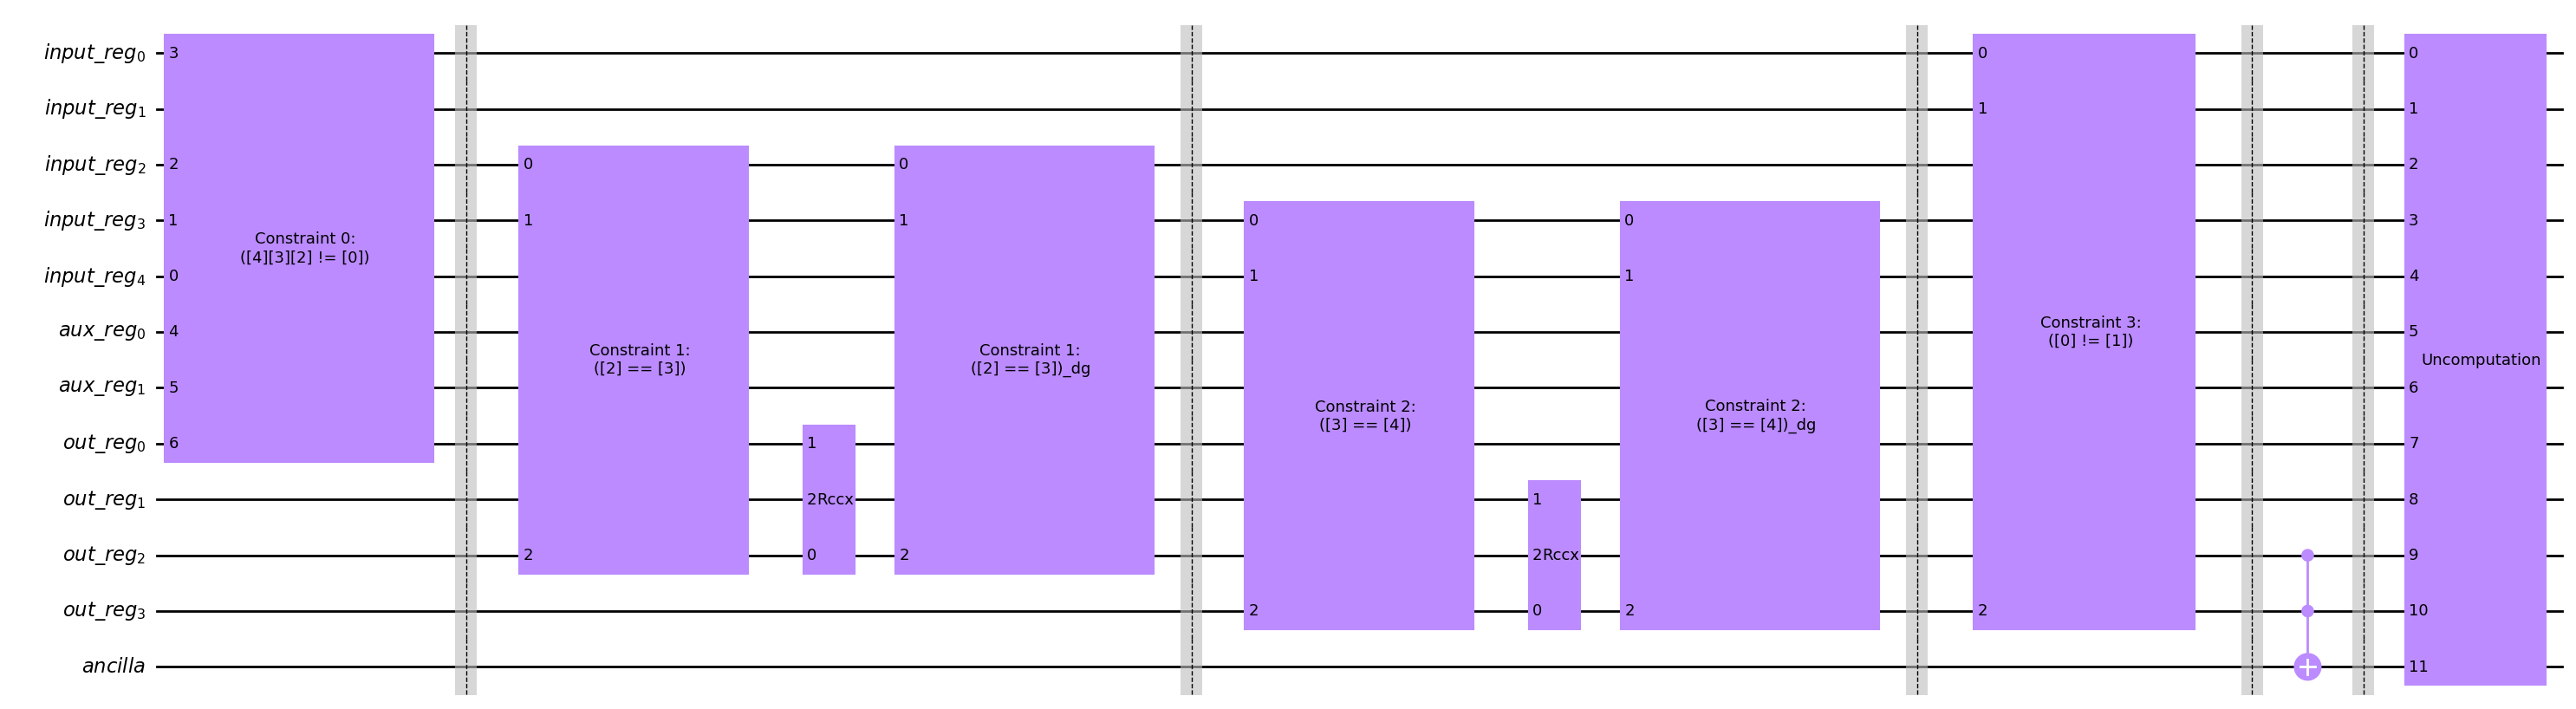


The operator - decomposed:


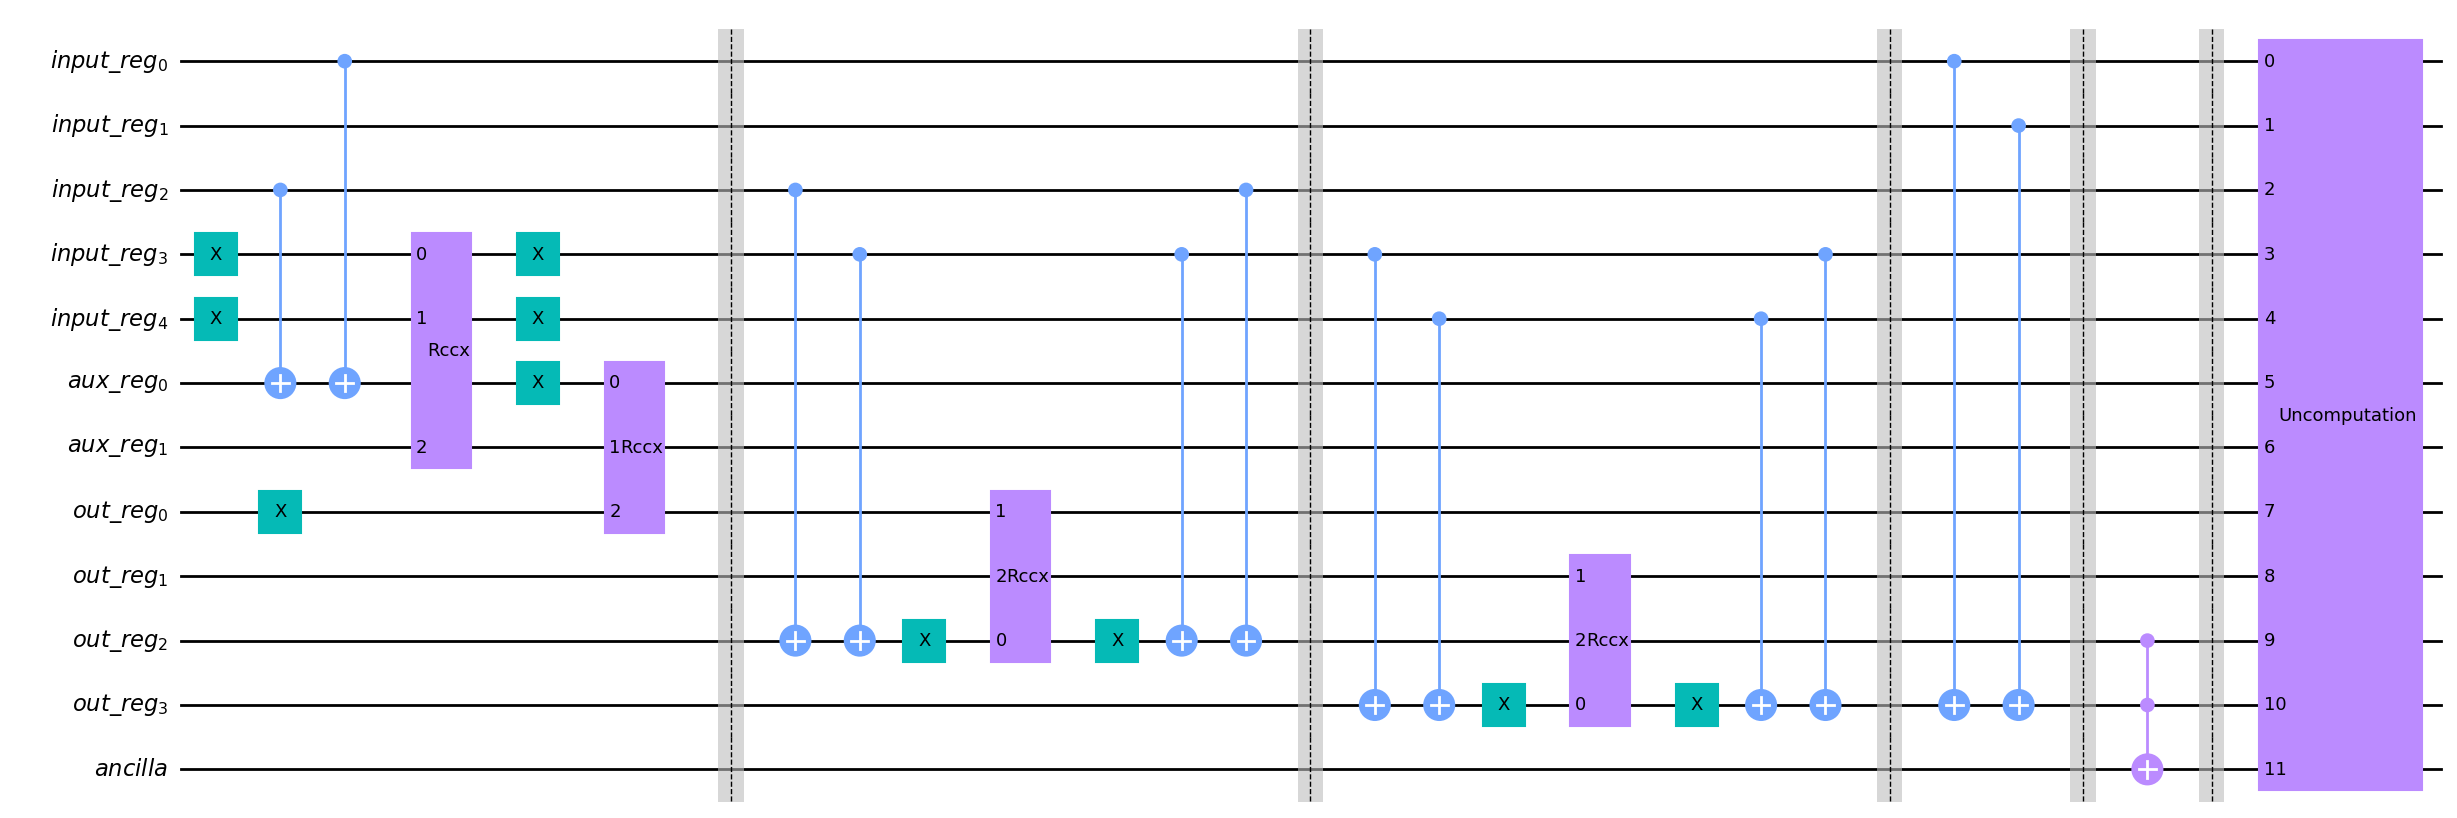


Operator depth: 22
Operator gates counts: OrderedDict([('cx', 12), ('x', 10), ('barrier', 5), ('rccx', 4), ('ccx', 1), ('Uncomputation', 1)])

Decomposed operator depth: 71
Decomposed operator gates counts: OrderedDict([('cx', 48), ('u3', 24), ('u1', 15), ('u', 10), ('x', 10), ('barrier', 9), ('u2', 6), ('rccx_dg', 2)])


The system is running the circuit 1024 times, please wait..
Execution time = 0.4476447105407715 seconds

The results for 1024 shots are:


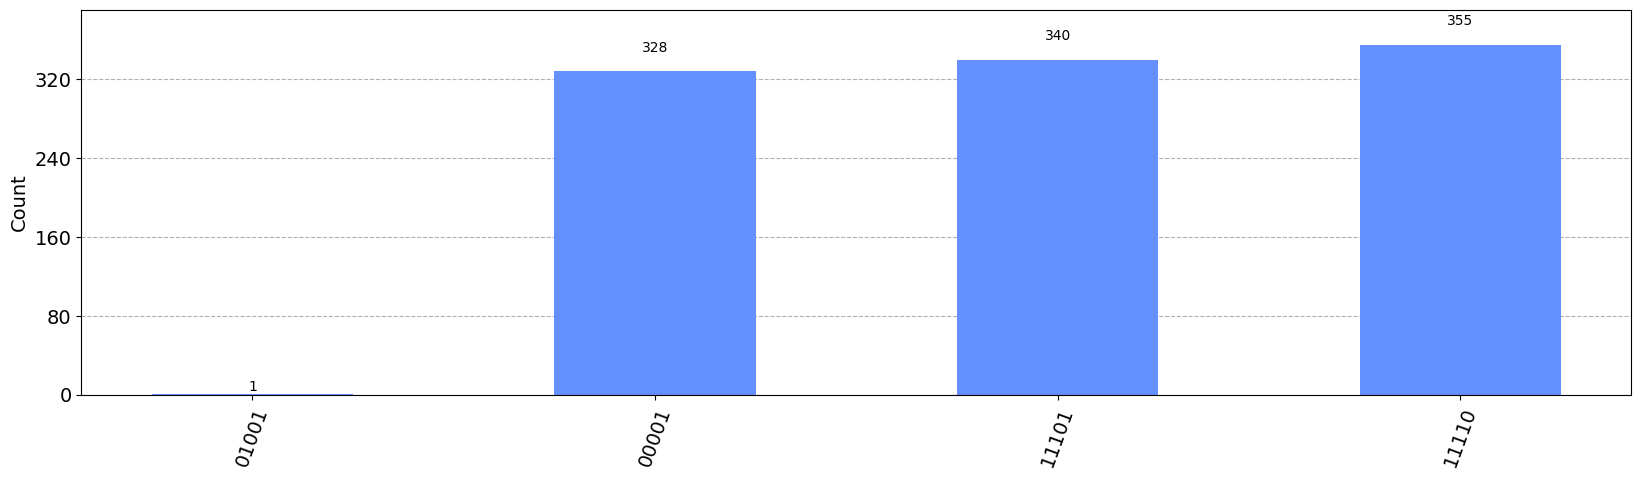

[('01001', 1), ('00001', 328), ('11101', 340), ('11110', 355)]


In [1]:
# TL;DR - Run this cell to see the program's functionality for the stated below data.
# For a more detailed guide-through, please skip this cell.

from sat_circuits_engine.interface import SATInterface

interface = SATInterface(
    num_input_qubits=5,
    constraints_string='([4][3][2] != [0]),([2] == [3]),([3] == [4]),([0] != [1])',
)

qc = interface.obtain_overall_sat_circuit(solutions_num=3)
interface.display_circuits(qc)

counts, counts_sorted = interface.run_overall_sat_circuit(qc, 1024)
interface.display_results(qc, 1024, counts, counts_sorted)

# SAT Circuits Synthesis Engine

This program builds and runs quantum circuits for a specific type of SAT problems.\
The program is Qiskit-based, with an ingenuine implementation (no use in high-level Qiskit extenstions is made) - based on Grover's algorithm and amplitude amplification.\
Since these kind of algorithms are totally impractical for NISQ devices, the program strictly uses the local Qiskit Aer simulator, in noiseless conditions.\
The program assumes naviely valid user inputs - invalid input formats would probably result in an error.

#### Several interfaces for using the program are suggested:

1. Calling `SAT()` without any parameters, and an interactive interface will ask you for several inputs.
2. Calling `SAT(n, constraints_string, shots, solutions_num)` and defining values for each of the parameters (otherwise the interactive interface will be activated).
3. Calling specific methods for the purpose of running distinct parts of the program (for only retrieving the circuit without running it, for example) - examples appear later on in this page.
4. NOTE that it's possible to run the program also from the terminal or the command line (by running the code in the next cell) - though my recommendation is using Jupyter Notebook for the best visualizations.

Since **option 1** is the most convenient one, if you choose this option just run the next cell and the interactive interface will guide you through.\
**NOTE:** it's important that you enter the string of constraints in a valid format. The format is explained within the interactive interface process - the explanation is imported from the <a href="constraints_format.txt">constraints_format.txt</a> file, and pre-tested examples data can be found in the <a href="test_data.txt">test_data.txt</a> file.

Examples for using the other options stated above, followed by output samples - appear after next cell.

### Option 1 - Interactive Interface:

Please enter the desired amount of input qubits: 4

The format of the constraints string we use is of the form: '(__CONSTRAINT 1__),(__CONSTRAINT 2__),...,(__CONSTRAINT N__)'.
Each '(__CONSTRAINT x__)' block is of the format: '(__LEFT_OPERAND__ __OPERATOR__ __RIGHT_OPERAND__)'.
The currently supported operators are: "==" and "!=".
The currently supported operands are bundles of qubits indexes (1 qubit or more) - Each qubit index should be written within a '[]'.
The qubit numbering convention we use is Little-Endian (the MSB is on the left side and the LSB is on the right side).

An example for a valid constraints string (3 constraints in that single string): '([0] == [5]),([3][2] != [5][4]),([6][5][4] == [1])'.
Examples of invalid strings: '1 == [5]', '([3] = [2]),(3 != 2)',...
No need for quotes ('') when entering the string to the program.

Please enter a string of constraints: ([0] == [1]),([2] == [3]),([1][0] != [3][2])

Please enter the amount of shots desired: 1000

If the expect

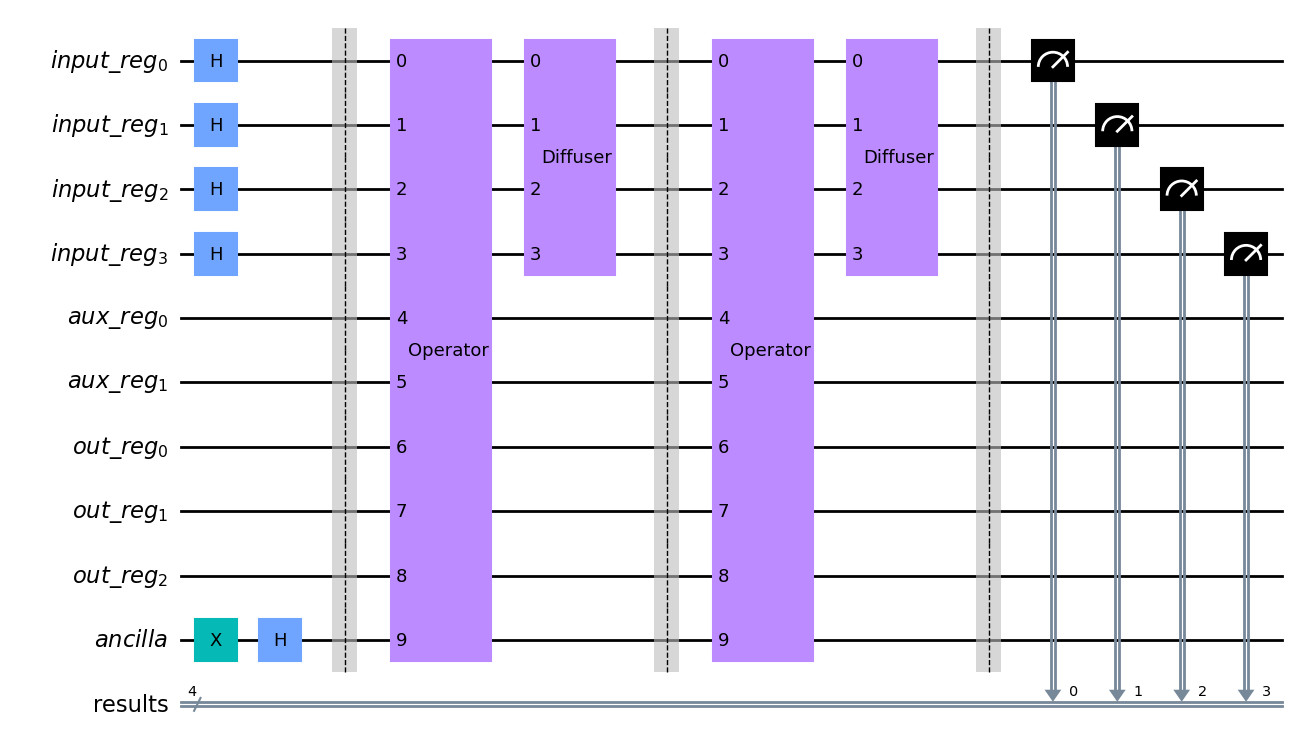


The operator:


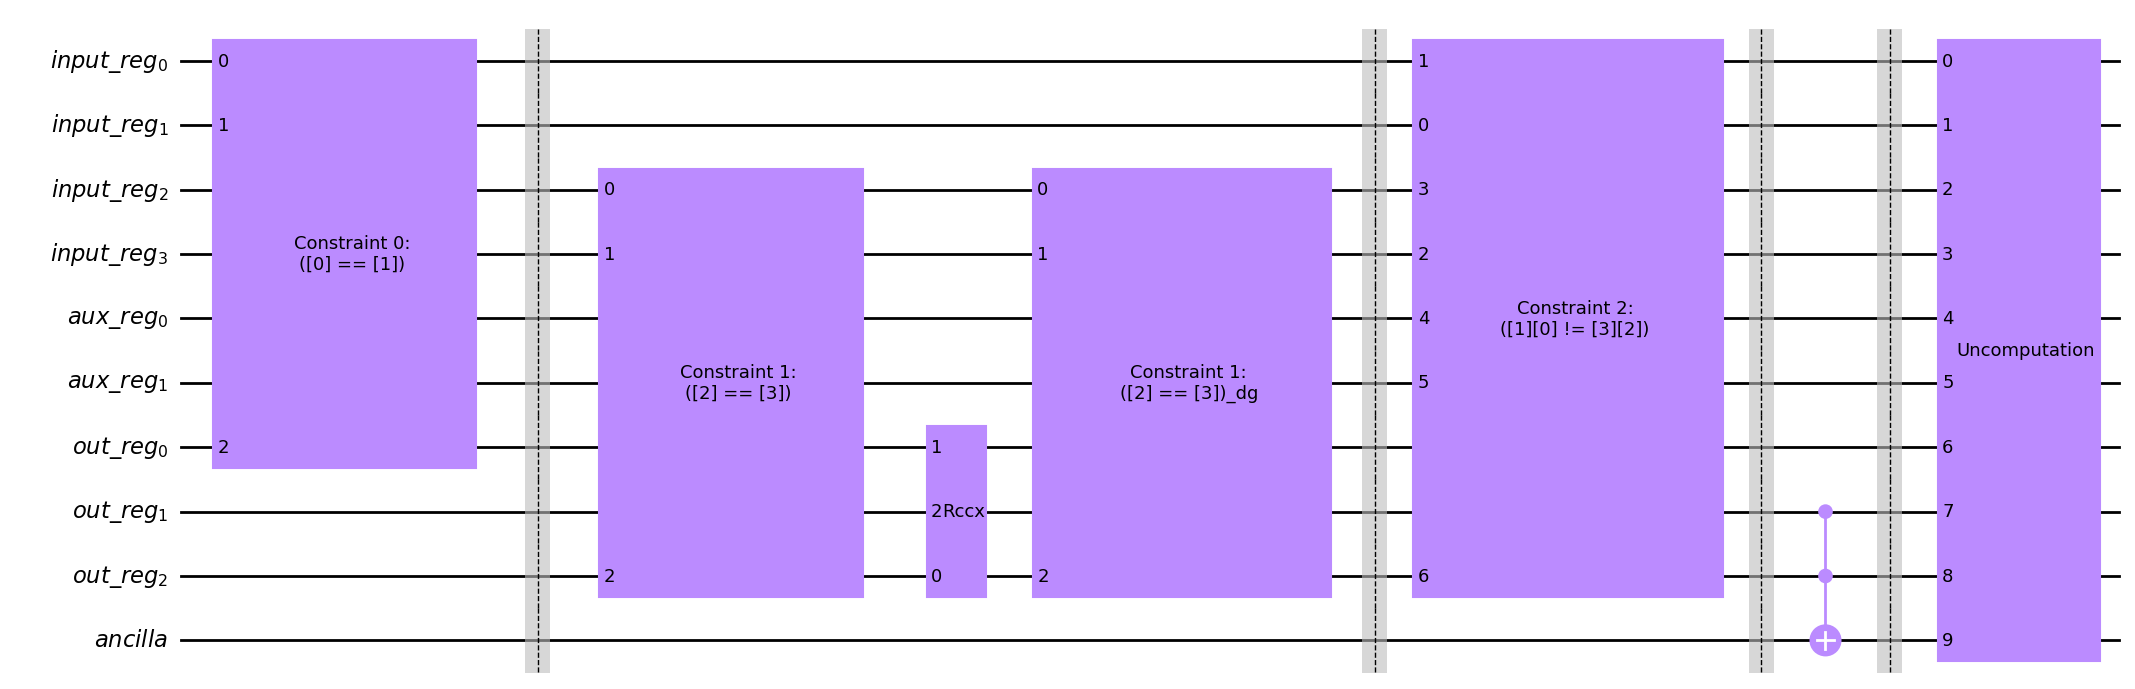


The operator - decomposed:


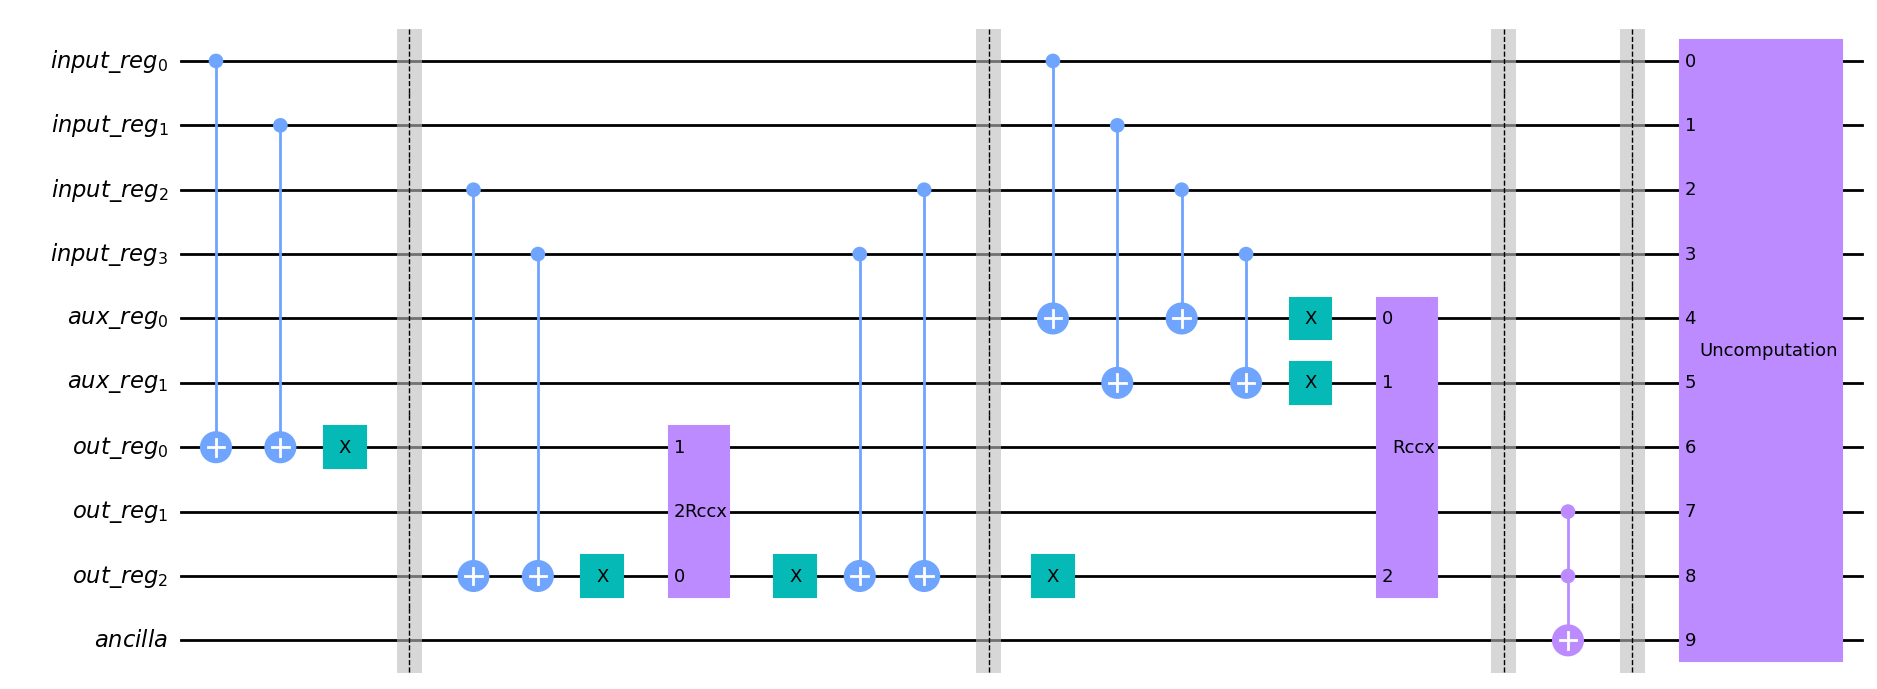


Operator depth: 16
Operator gates counts: OrderedDict([('cx', 10), ('x', 6), ('barrier', 4), ('rccx', 2), ('ccx', 1), ('Uncomputation', 1)])

Decomposed operator depth: 49
Decomposed operator gates counts: OrderedDict([('cx', 35), ('u3', 12), ('u1', 11), ('barrier', 7), ('u', 6), ('x', 6), ('u2', 4), ('rccx_dg', 1)])


The system is running the circuit 1000 times, please wait..
Execution time = 0.25402116775512695 seconds

The results for 1000 shots are:


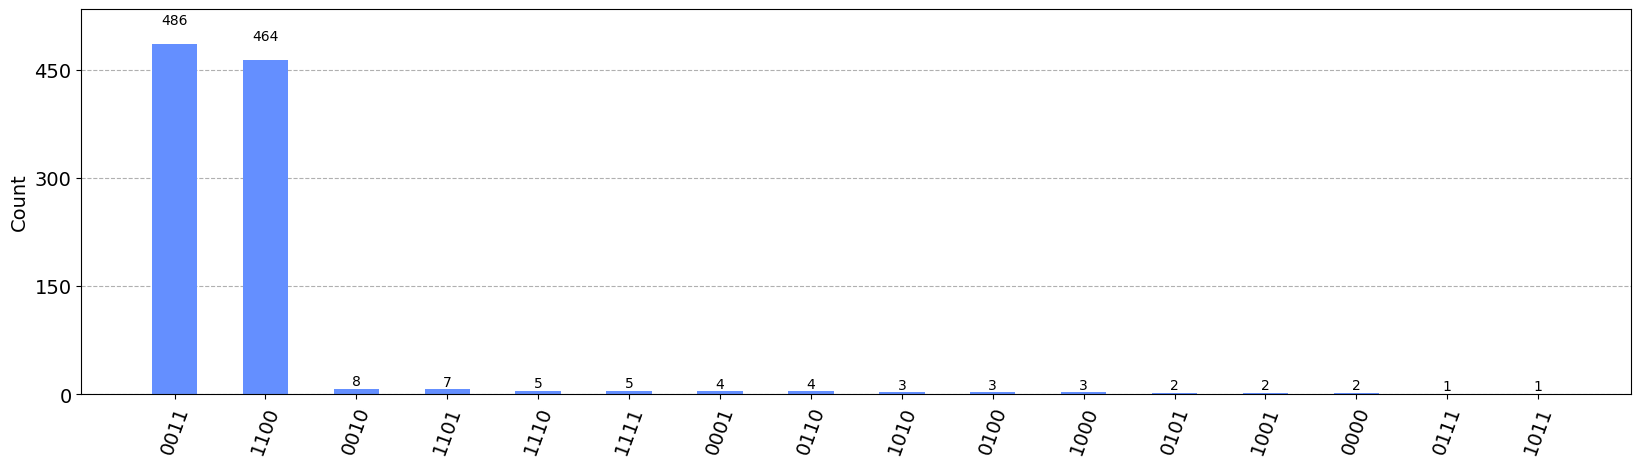

Distilled solutions:
{'0011', '1100'}

All counts:
[('0011', 486), ('1100', 464), ('0010', 8), ('1101', 7), ('1111', 5), ('1110', 5), ('0110', 4), ('0001', 4), ('1000', 3), ('0100', 3), ('1010', 3), ('0000', 2), ('1001', 2), ('0101', 2), ('1011', 1), ('0111', 1)]


In [1]:
# Option 1.
# Run this cell to begin.

from sat_circuits_engine.interface import SATInterface

SATInterface()

### Option 2 - Calling `SAT(params)` Directly:

Let's consider the example from the TL;DR section above:

In [ ]:
# Option 2.
# It is recommended to go through the explanation first and then running this cell with a desired data.

from sat_circuits_engine.interface import sat_interface

sat_interface(
    num_input_qubits=5,
    constraints_string='([4][3][2] != [0]),([2] == [3]),([3] == [4]),([0] != [1])',
    shots=1024,
    solutions_num=3
)

#### Parameters explained:
1. `num_input_qubits` = The desired number of qubits.
2. `constraints_string` = The SAT problem input in a specific format - <a href="inteface/constraints_format.txt">constraints_format.txt</a> (take a look on the format's guidelines!). Pre-tested example data can be found in the <a href="data/test_data.json">test_data.json</a> file.
3. `shots` = The desired number of shots (If not sure, set to 1024).
4. `solutions_num` = The expected number of solutions for the SAT problem. If the expected number of solutions is known - enter it - it's the most simple and easy case. If the expected number of solutions is unknown, enter a value of -1. The program will handle this using a variation of a method described in <a href="https://arxiv.org/abs/quant-ph/9605034">this paper</a> (section 4) by *Boyer et al*. We chose to use a computational-costly variation of the described method for the sake of results' complecity - The program will find an adequate number of iterations over Grover's iterator, followed by a full representation of the results (as in the case where the exact number of expected solutions is known).

#### Results review:
The program will output (in this order):
1. Histogram representation of the results.
2. Dictionary representation of the results.
3. The high-level overall circuit scheme.
4. High-level representation of the Grover's operator built by the program.
5. Low-level representation of the Grover's operator built by the program.

For our example, output (4) is:
<img src="images/operator_HL_example.png" />

And output (5) is:
<img src="images/operator_LL_example.png" />

### Option 3 - Partly Usage:

One might obtain solely the appropriate Grover's operator for given constraints, by explicitly creating the `Constraints` object (child class of `QuantumCircuit`), using the following code, for instance:

In [ ]:
from sat_circuits_engine.circuit import GroverConstraintsOperator

operator = GroverConstraintsOperator('([0] != [1]), ([4][3] != [5]), ([1] != [4][3]), ([4][3] != [6]), ([6] != [7]), ([0] != [2]), ([1] != [6]), ([5] != [7])', 8)

By drawing `operator` an identical circuit to output (4) above is obtained:

# FROM HERE IT'S DRAFT - DELETE BEFORE MERGING TO PRODUCTION

In [ ]:
operator.draw(output='mpl', fold=-1)

In [ ]:
operator.decompose().draw(output='mpl', fold=-1)

In [ ]:
from sat_circuits_engine.circuit import GroverConstraintsOperator

operator = GroverConstraintsOperator('([4][3][2] != [0]),([2] == [3]),([3] == [4]),([0] != [1])', 5)

operator.draw('mpl', fold=-1)

In [5]:
operator.decompose().draw('mpl', fold=-1)

NameError: name 'operator' is not defined

In [17]:
import numpy as np

np.sqrt(2 ** 20)

1024.0

In [62]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

counts = AerSimulator().run(qc).result().get_counts()

In [55]:
dir(counts)

['__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__ior__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__ror__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_remove_space_underscore',
 'bitstring_regex',
 'clear',
 'copy',
 'creg_sizes',
 'fromkeys',
 'get',
 'hex_outcomes',
 'hex_raw',
 'int_outcomes',
 'int_raw',
 'items',
 'keys',
 'memory_slots',
 'most_frequent',
 'pop',
 'popitem',
 'setdefault',
 'shots',
 'time_taken',
 'update',
 'values']

In [68]:
counts

{'00': 516, '11': 508}

In [69]:
sorted()

TypeError: sorted expected 1 argument, got 0

In [96]:
s = {i for i in range(1, 10) if i % 4 != 0}
s

{1, 2, 3, 5, 6, 7, 9}